In [1]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB 1.3 MB/s eta 0:00:01
   --- ----------------------------------- 61.4/626.3 kB 544.7 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 819.2 kB/s eta 0:00:01
   ------ ------------------------------- 112.6/626.3 kB 819.2 kB/s eta 0:00:01
   --------------- ------------------------ 245.8/626.3 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 245.8/626.3 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/626.3 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/626.3 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 593.9/626.3 kB 1.4 MB/s eta 0:00:01
  

In [3]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.4 MB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 787.7 kB/s eta 0:00:01
   --------------- ------------------------ 112.6/300.2 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/300.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/300.2 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install vaderSentiment


     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --------- --------------------------- 30.7/126.0 kB 660.6 kB/s eta 0:00:01
     --------- --------------------------- 30.7/126.0 kB 660.6 kB/s eta 0:00:01
     ----------------------------- ------ 102.4/126.0 kB 737.3 kB/s eta 0:00:01
     ----------------------------- ------ 102.4/126.0 kB 737.3 kB/s eta 0:00:01
     ------------------------------------ 126.0/126.0 kB 570.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Standard Libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


# For Web Scrapping
import requests
from bs4 import BeautifulSoup

# For Data Pre-processing
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer   
from textblob import Word, TextBlob
from wordcloud import WordCloud , STOPWORDS

# For topic modeling
from sklearn.decomposition import NMF, LatentDirichletAllocation

# For sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Extracting reviews from "Skytrax" website

In [8]:
website = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50              # Total no. of pages selected for review extraction
page_size = 100          

reviews = []            # object to store extracted reviews from website

for i in range(1, pages + 1):      

    print(f"Scraping data from Page {i}")

    # Create URL to collect links 
    url = f"{website}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    
    response = requests.get(url)     # Collect HTML data from this page

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} Total Reviews")

Scraping data from Page 1
   ---> 100 Total Reviews
Scraping data from Page 2
   ---> 200 Total Reviews
Scraping data from Page 3
   ---> 300 Total Reviews
Scraping data from Page 4
   ---> 400 Total Reviews
Scraping data from Page 5
   ---> 500 Total Reviews
Scraping data from Page 6
   ---> 600 Total Reviews
Scraping data from Page 7
   ---> 700 Total Reviews
Scraping data from Page 8
   ---> 800 Total Reviews
Scraping data from Page 9
   ---> 900 Total Reviews
Scraping data from Page 10
   ---> 1000 Total Reviews
Scraping data from Page 11
   ---> 1100 Total Reviews
Scraping data from Page 12
   ---> 1200 Total Reviews
Scraping data from Page 13
   ---> 1300 Total Reviews
Scraping data from Page 14
   ---> 1400 Total Reviews
Scraping data from Page 15
   ---> 1500 Total Reviews
Scraping data from Page 16
   ---> 1600 Total Reviews
Scraping data from Page 17
   ---> 1700 Total Reviews
Scraping data from Page 18
   ---> 1800 Total Reviews
Scraping data from Page 19
   ---> 1900 Total 

In [9]:
# Storing reviews in a pandas dataframe 
df = pd.DataFrame()               
df["reviews"] = reviews             
df.head()

,reviews
0,✅ Trip Verified | That was supposed to be my ...
1,✅ Trip Verified | Have no fear when your BA f...
2,Not Verified | We have flown BA five times fr...
3,✅ Trip Verified | London Heathrow to Istanbul...
4,"Not Verified | Jan 30th, I booked a last-minut..."


#### * We have collected the data required for this task. 
#### *The loops above collected 3754 reviews by iterating through the pages on the website. 
#### * Next step is to clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed wherever it exists as it's not relevant or any special characters etc.

# 1. Text Preprocessing

## 1.1.Removing the symbol " | " 

In [10]:
df.reviews= df.reviews.str.split('|',expand=True)[1]          # it will split the text before and after the symbol

In [11]:
df.head()

,reviews
0,That was supposed to be my flight but it was...
1,Have no fear when your BA flight is operated...
2,We have flown BA five times from western USA...
3,London Heathrow to Istanbul at the start of ...
4,"Jan 30th, I booked a last-minute, transatlant..."


## 1.2.Regular Expressions

#### sub() function belongs to the Regular Expressions ( re ) module in Python. 
#### It returns a string where all matching occurrences of the specified pattern are replaced by required string or blanks.

In [12]:
def replace(text):            # Define a function to clean the text
    text = re.sub(r'[^A-Za-z]+', ' ', str(text)) # Replaces all special characters and numericals with blanks and leaving the alphabets
    return text
# Cleaning the text in the review column
df['reviews']= df["reviews"].apply(replace)
df.head()

,reviews
0,That was supposed to be my flight but it was ...
1,Have no fear when your BA flight is operated ...
2,We have flown BA five times from western USA ...
3,London Heathrow to Istanbul at the start of t...
4,Jan th I booked a last minute transatlantic f...


## 1.3.Converting into Lower Case

In [13]:
df['reviews'] = df['reviews'].str.lower()

In [14]:
df.head()

,reviews
0,that was supposed to be my flight but it was ...
1,have no fear when your ba flight is operated ...
2,we have flown ba five times from western usa ...
3,london heathrow to istanbul at the start of t...
4,jan th i booked a last minute transatlantic f...


## 1.4.Removing Punctuations

In [15]:
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')

In [16]:
df.head()

,reviews
0,that was supposed to be my flight but it was ...
1,have no fear when your ba flight is operated ...
2,we have flown ba five times from western usa ...
3,london heathrow to istanbul at the start of t...
4,jan th i booked a last minute transatlantic f...


## 1.5.Removing Numbers

In [17]:
df['reviews'] = df['reviews'].str.replace('\d', '')

In [18]:
df.head()

,reviews
0,that was supposed to be my flight but it was ...
1,have no fear when your ba flight is operated ...
2,we have flown ba five times from western usa ...
3,london heathrow to istanbul at the start of t...
4,jan th i booked a last minute transatlantic f...


## 1.6.Word Tokenization

In [20]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [21]:
df["reviews"].apply(lambda x: TextBlob(x).words).head()

0    [that, was, supposed, to, be, my, flight, but,...
1    [have, no, fear, when, your, ba, flight, is, o...
2    [we, have, flown, ba, five, times, from, weste...
3    [london, heathrow, to, istanbul, at, the, star...
4    [jan, th, i, booked, a, last, minute, transatl...
Name: reviews, dtype: object

## 1.7.Removing Stopwords

In [23]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
sw = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [25]:
df.head()

,reviews
0,supposed flight cancelled hours takeoff nearly...
1,fear ba flight operated finnair business class...
2,flown ba five times western usa england always...
3,london heathrow istanbul start half term schoo...
4,jan th booked last minute transatlantic flight...


## 1.8.Lemmatization

In [27]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...


True

In [28]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviews'].head(10)

0    supposed flight cancelled hour takeoff nearly ...
1    fear ba flight operated finnair business class...
2    flown ba five time western usa england always ...
3    london heathrow istanbul start half term schoo...
4    jan th booked last minute transatlantic flight...
5    british airway gold guest list member lifetime...
6    another case reviewing british airway flight a...
7    memorable day january th family embarked journ...
8    actually get fly ba cancelled flight day notic...
9    possibly worse check experience ever ever took...
Name: reviews, dtype: object

In [29]:
df.head()

,reviews
0,supposed flight cancelled hour takeoff nearly ...
1,fear ba flight operated finnair business class...
2,flown ba five time western usa england always ...
3,london heathrow istanbul start half term schoo...
4,jan th booked last minute transatlantic flight...


# 2.Topic Modeling 

## 2.1.Vectorizing Raw Text

#### At this juncture, our raw text though human readable is still unfortunately not yet machine readable. A machine can read in bits and numbers and therefore we will first need to convert our text into numbers for which we utilise a very common approach known as the Bag-of-Words

#### The Bag of Words approach - This approach uses the counts of words as a starting block and records the occurrence of each word (from the entire text) in a vector specific to that particular word.

In [38]:
cv = CountVectorizer()
x = cv.fit_transform(reviews)         # Fitting the vectorizer to the dataset

In [39]:
x

<3754x14164 sparse matrix of type '<class 'numpy.int64'>'
	with 379048 stored elements in Compressed Sparse Row format>

## 2.2.Implementing topic modelling techniques-Latent Dirichlet Allocation

#### Latent Dirichlet Allocation  
Probabilistic, generative model which uncovers the topics latent to a dataset by assigning weights to words in a corpus, where each topic will assign different probability weights to each word.

In [40]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [41]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [43]:
lda.fit(x)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

In [50]:
### Topics generated by LDA


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


n_top_words = 40
print("\nTopics in LDA model: ")
cv_feature_names = np.array(cv.get_feature_names_out())
print_top_words(lda, cv_feature_names, n_top_words)


Topics in LDA model: 

Topic #0: the and to was in of on with flight is for were it but ba not very as food this at seat crew service good cabin from that have seats class are had no you time we which be my

Topic #1: seafood kwi b737 436 rain accessed the wir 10a heidseck monopole confined 10b vrn verona catullo und aerobridges colombo inconveniently hydrated intoxicated quintessentially teenagers blah flap ib gig caviar and 932 937 documentary 1340 jun dus peculiar dept creamers animation

Topic #2: pains trackers 0725 bd pointlessness 287 brien lily snobbish checkpoint signage bitter whine executed tokyo vdu appreciation 200er soaps cocked hat ifs lustre underground sorting lan flash stooped displeasure gcm tune wallet lon uniforms knocks 286 ba709 football 62a boycott

Topic #3: irritated panacotta attracts blueberries aud letters 3250 restaurant sodium rhodes jargon roasted posting carrots intercepted keith insulator fortnightly pipe 120k williams serviceability modestly cheekily

### 2.3.Generating the wordcloud for the first 4 topics

In [51]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

In [52]:
first_topic_words = [cv_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [cv_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [cv_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [cv_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

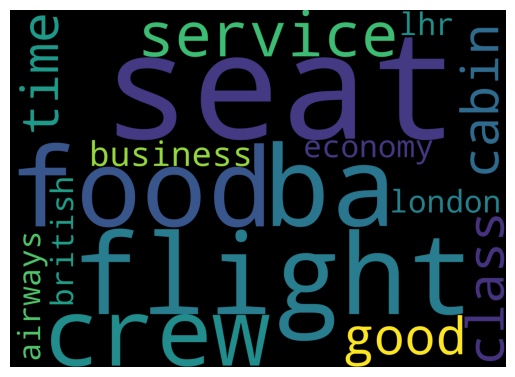

In [53]:
# Generating the wordcloud with the values for first topic
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

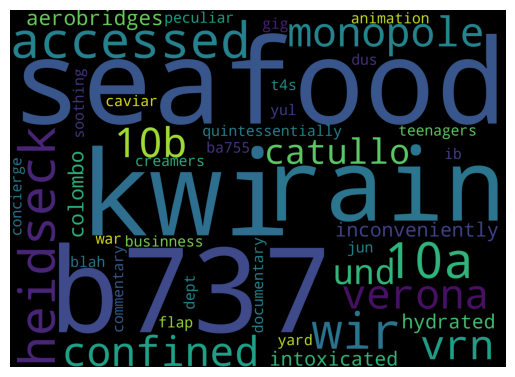

In [54]:
#Generating the wordcloud with the values for Second topic
secondcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()

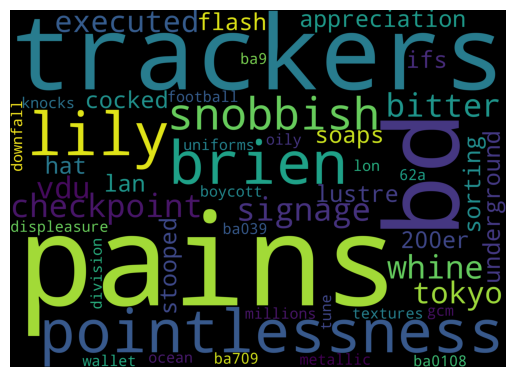

In [55]:
# Generating the wordcloud with the values for third topic
thirdcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()

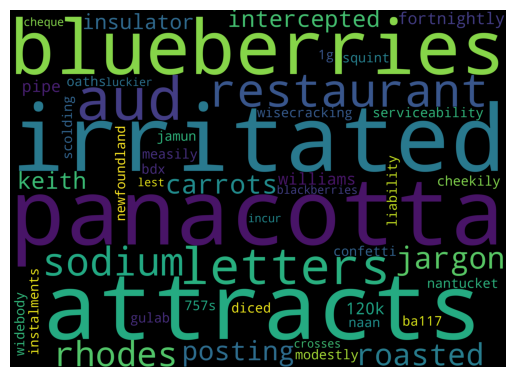

In [56]:
# Generating the wordcloud with the values for fourth topic
fourthcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(fourth_topic_words))
plt.imshow(fourthcloud)
plt.axis('off')
plt.show()

# 3.Sentiment Analysis

#### *For Sentiment Analysis, we’ll use VADER Sentiment Analysis, where VADER means Valence Aware Dictionary and sentiment Reasoner.
#### *VADER not only tells about the Polarity score , in addition, it tells us how positive or negative a statement is.

In [57]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)


def vader_analysis(compound):                
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Sentiment,Analysis
0,supposed flight cancelled hour takeoff nearly ...,-0.6369,Negative
1,fear ba flight operated finnair business class...,0.6124,Positive
2,flown ba five time western usa england always ...,-0.0976,Negative
3,london heathrow istanbul start half term schoo...,0.6318,Positive
4,jan th booked last minute transatlantic flight...,-0.9113,Negative


In [58]:
analysis = df['Analysis'].value_counts()
analysis

Neutral     1786
Positive    1125
Negative     843
Name: Analysis, dtype: int64

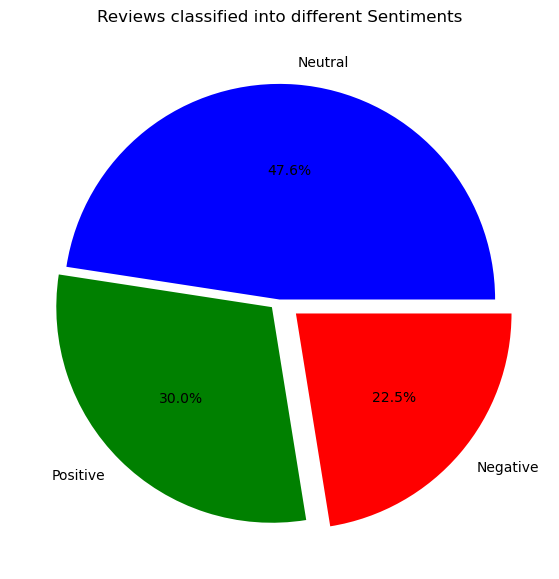

In [59]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,2)
plt.title("Reviews classified into different Sentiments")
plt.pie(analysis.values, labels = analysis.index, explode = (0, 0.05, 0.1), autopct='%1.1f%%', shadow=False , colors=("blue", "green", "red"))
plt.show()

# 4.Text Visualization

## 4.1.Top 50 words with highest frequency in our dataset

In [60]:
all_words = df['reviews'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies in the dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

## 4.2.WordCloud of our dataset

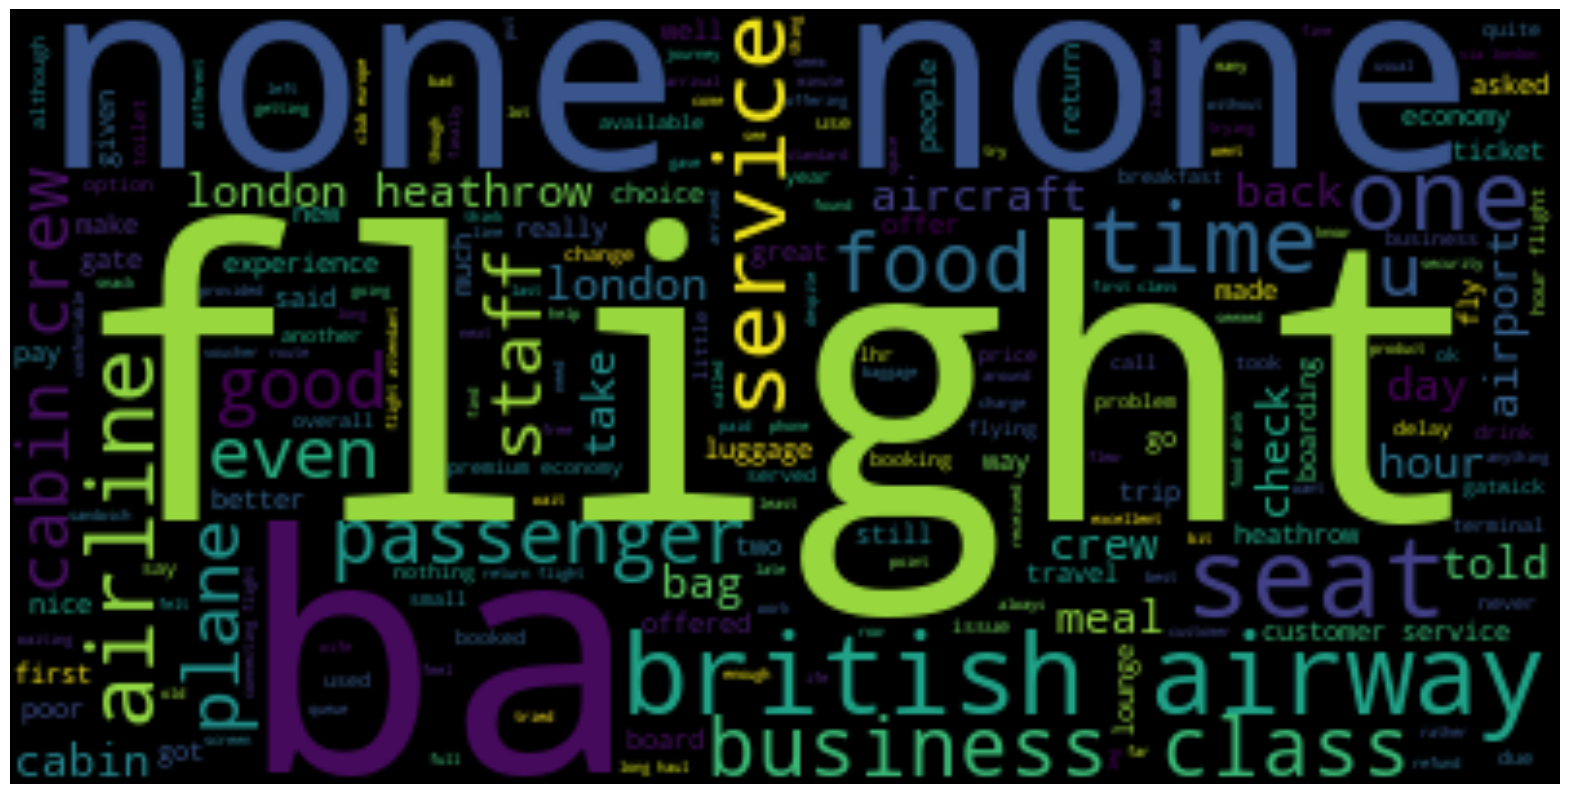

In [61]:
text = " ".join(i for i in df.reviews)
wordcloud = WordCloud().generate(text)
fig = plt.figure(1, figsize=(20, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()